# System Modelling

Author : Masuk  
Help   : Nishi

In [1]:
# Make sure lenstronomy is installed, otherwise install the latest pip version
try:
    import lenstronomy
except:
    !pip install lenstronomy

## Import of standard python libraries

In [2]:
import numpy as np
import corner
import matplotlib.pyplot as plt

%matplotlib inline

## Load imaging and psf data

In [3]:
import h5py  # library to work with '.h5' files

In [4]:
with h5py.File('./DESIJ1421-0022_F140W.h5', 'r') as f:  # loading image data
    kwargs_data = {}
    for key in f:
        kwargs_data[key] = f[key][()]
        
kwargs_data

{'background_rms': 0.016322818764336215,
 'dec_at_xy_0': -5.639999999999994,
 'exposure_time': array([[392.5919 , 429.8496 , 477.49698, ..., 417.0545 , 626.3687 ,
         470.51013],
        [537.5037 , 481.4545 , 402.75043, ..., 445.28027, 411.41382,
         414.60626],
        [441.50906, 430.91473, 528.3243 , ..., 582.93396, 452.38983,
         456.0343 ],
        ...,
        [455.4104 , 487.22336, 492.4171 , ..., 564.8773 , 450.29538,
         395.7962 ],
        [509.2898 , 384.29117, 459.5256 , ..., 396.0305 , 487.2688 ,
         570.89014],
        [438.19513, 478.61502, 508.9901 , ..., 350.71753, 400.08707,
         430.7757 ]], dtype=float32),
 'image_data': array([[-0.00921469, -0.02078328,  0.00167325, ..., -0.0132964 ,
         -0.03175444, -0.01695797],
        [-0.00559985, -0.01327114, -0.00524183, ...,  0.00243682,
         -0.00851916, -0.01378721],
        [ 0.00427728, -0.00057159, -0.02292269, ..., -0.01166504,
         -0.00735005, -0.00661949],
        ...,
   

In [5]:
with h5py.File('./psf_F140W.h5', 'r') as f:  # loading psf data
    kwargs_psf = {}
    for key in f:
        kwargs_psf[key] = f[key][()]
        
kwargs_psf['psf_type'] = 'PIXEL'
kwargs_psf

{'kernel_point_source': array([[5.7422681e-06, 4.5087054e-06, 2.4900439e-06, ..., 1.8486933e-06,
         3.2385867e-06, 4.4331632e-06],
        [3.9503216e-06, 9.9817180e-06, 6.5966469e-06, ..., 3.9997908e-06,
         6.6143798e-06, 4.1430776e-06],
        [2.9697005e-06, 5.5563592e-06, 1.2795975e-05, ..., 7.8115263e-06,
         5.1404800e-06, 1.7530243e-06],
        ...,
        [1.6921831e-06, 3.7347368e-06, 7.6415899e-06, ..., 1.1465157e-05,
         5.3933368e-06, 1.6360833e-06],
        [2.8819463e-06, 6.2348781e-06, 4.7564718e-06, ..., 4.5906190e-06,
         8.7221979e-06, 3.7005334e-06],
        [3.7170516e-06, 3.6243027e-06, 1.6518559e-06, ..., 2.0127884e-06,
         3.2246478e-06, 5.1252514e-06]], dtype=float32),
 'psf_type': 'PIXEL'}

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19424\1703526135.py:7: RuntimeWarning: invalid value encountered in log10
  axes[0].imshow(np.log10(image), origin='lower', cmap='cubehelix')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19424\1703526135.py:10: RuntimeWarning: invalid value encountered in log10
  axes[1].imshow(np.log10(image), origin='lower', cmap='cubehelix')


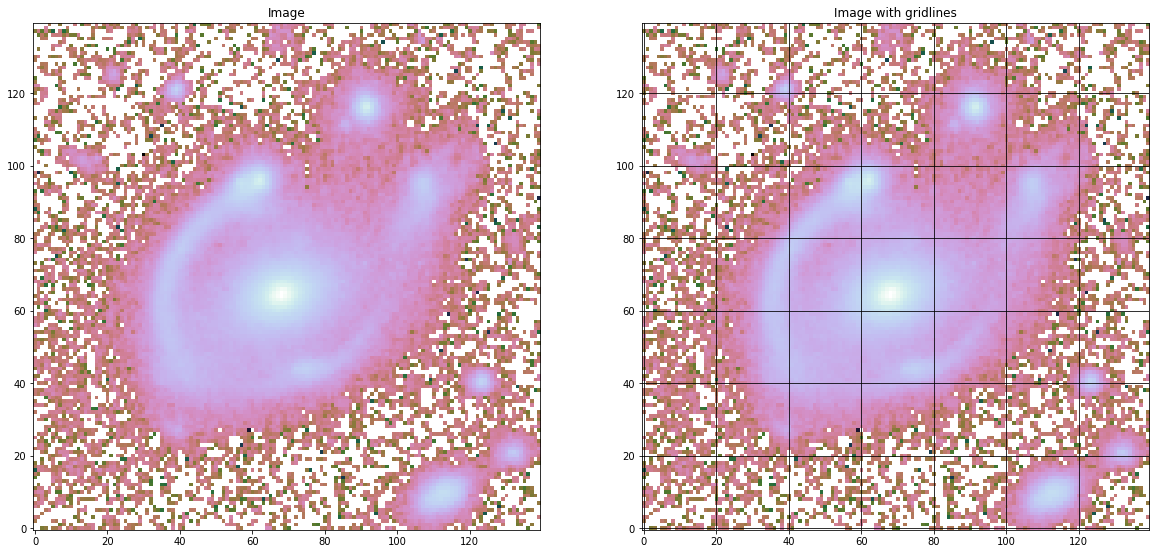

In [6]:
# extracting image_data from kwargs_data
image = kwargs_data['image_data']

# Make the plot
fig, axes = plt.subplots(1, 2, figsize=(20,20))

axes[0].imshow(np.log10(image), origin='lower', cmap='cubehelix')
axes[0].set_title('Image')

axes[1].imshow(np.log10(image), origin='lower', cmap='cubehelix')
axes[1].set_title('Image with gridlines')
axes[1].grid(True,color='black')

# Show the plots
plt.show()

## Masking

In [7]:
from lenstronomy.Util import mask_util
from lenstronomy.Util import util

from lenstronomy.Data.coord_transforms import Coordinates

In [8]:
ra_at_xy_0 = kwargs_data['ra_at_xy_0']
dec_at_xy_0 = kwargs_data['dec_at_xy_0']
transform_pix2angle = kwargs_data['transform_pix2angle']

coords = Coordinates(transform_pix2angle, ra_at_xy_0, dec_at_xy_0)
num_pix = len(image)

x_coords, y_coords = coords.coordinate_grid(num_pix, num_pix)

a = 4.2 # arcsecond (0.8 arcsec = 10 pix)
b = 3.5
lens_center_ra = 0
lens_center_dec = 0

mask_outer = mask_util.mask_ellipse(util.image2array(x_coords),
                                    util.image2array(y_coords),
                                    lens_center_ra,
                                    lens_center_dec,
                                    a, b, -np.pi/4)
      
# 11 o' clock
mask_ext1 = mask_util.mask_ellipse(util.image2array(x_coords),
                                    util.image2array(y_coords),
                                    lens_center_ra+0.8,
                                    lens_center_dec+2,
                                    0.7, 0.5, -np.pi/6)

# mask_ext1 = mask_util.mask_center_2d(lens_center_ra+0.8,
#                                       lens_center_dec+2.1,
#                                       0.5,
#                                       util.image2array(x_coords),
#                                       util.image2array(y_coords))


# 1 o' clock
mask_ext2 = mask_util.mask_ellipse(util.image2array(x_coords),
                                    util.image2array(y_coords),
                                    lens_center_ra-1.6,
                                    lens_center_dec+3.6,
                                    0.7, 0.5, -np.pi/6)
                                   

# mask_ext2 = mask_util.mask_center_2d(lens_center_ra-1.6,
#                                       lens_center_dec+3.7,
#                                       0.5,
#                                       util.image2array(x_coords),
#                                       util.image2array(y_coords))



# 2 o' clock

mask_ext3 = mask_util.mask_ellipse(util.image2array(x_coords),
                                    util.image2array(y_coords),
                                    lens_center_ra-2.9,
                                    lens_center_dec+1.8,
                                    0.8, 0.5, -np.pi/3)

# mask_ext3 = mask_util.mask_center_2d(lens_center_ra-2.9,
#                                       lens_center_dec+1.8,
#                                       0.4,
#                                       util.image2array(x_coords),
#                                       util.image2array(y_coords))


# 5 o' clock

mask_ext4 = mask_util.mask_ellipse(util.image2array(x_coords),
                                    util.image2array(y_coords),
                                    lens_center_ra-0.5,
                                    lens_center_dec-2.1,
                                    0.6, 0.3, 0)

# mask_ext4 = mask_util.mask_center_2d(lens_center_ra-0.5,
#                                       lens_center_dec-2.1,
#                                       0.3,
#                                       util.image2array(x_coords),
#                                       util.image2array(y_coords))


# 7 o' clock
mask_ext5 = mask_util.mask_center_2d(lens_center_ra+2.5,
                                      lens_center_dec-3.4,
                                      0.4,
                                      util.image2array(x_coords),
                                      util.image2array(y_coords))

        
mask = mask_outer * (1 - mask_ext1) * (1 - mask_ext2) 
mask = mask * (1 - mask_ext3) 
mask = mask * (1 - mask_ext4) * mask_ext5
mask[mask >= 1] = 1
mask[mask < 0] = 0

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19424\215846058.py:4: RuntimeWarning: invalid value encountered in log10
  axes[0].imshow(np.log10(image), origin='lower', cmap='cubehelix')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19424\215846058.py:14: RuntimeWarning: divide by zero encountered in log10
  image_after_mask = np.log10(image*mask)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19424\215846058.py:14: RuntimeWarning: invalid value encountered in log10
  image_after_mask = np.log10(image*mask)


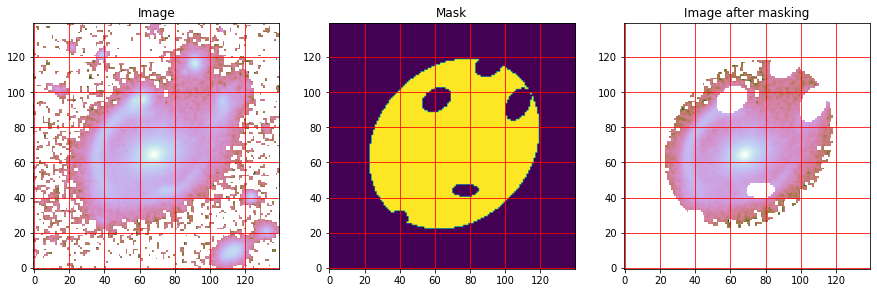

In [9]:
# Setting the subplots
fig, axes = plt.subplots(1, 3, figsize=(15,15))

axes[0].imshow(np.log10(image), origin='lower', cmap='cubehelix')
axes[0].grid(True, color='red')
axes[0].set_title('Image')

mask = mask.reshape(num_pix, num_pix)

axes[1].imshow(mask, origin='lower')
axes[1].grid(True, color='red')
axes[1].set_title('Mask')

image_after_mask = np.log10(image*mask)

axes[2].imshow(image_after_mask, origin='lower', cmap='cubehelix')
axes[2].grid(True, color='red')
axes[2].set_title('Image after masking')


# Show the plots
plt.show()

## Building a lens model

In [10]:
# adding shear into lens_model_list
lens_model_list = ['EPL', 'SHEAR']  
# adding shapelets into source_model_list
source_model_list = ['SERSIC_ELLIPSE', 'SHAPELETS']  
lens_light_model_list = ['SERSIC_ELLIPSE']

### Lens galaxy's mass model

In [11]:
fixed_lens = []
kwargs_lens_init = []
kwargs_lens_sigma = []
kwargs_lower_lens = []
kwargs_upper_lens = []

fixed_lens.append({}) 

fixed_lens.append({'ra_0': 0, 'dec_0': 0})

kwargs_lens_init.append({'theta_E': 1,
                         'gamma': 2.,
                         'e1': 0.,
                         'e2': 0.,
                         'center_x': 0.,
                         'center_y': 0.}) 

kwargs_lens_sigma.append({'theta_E': 0.01,
                          'gamma': .1,
                          'e1': 0.05,
                          'e2': 0.05,
                          'center_x': 0.5,
                          'center_y': 0.5}) 

kwargs_lower_lens.append({'theta_E': 0.1,
                          'gamma': 1.,
                          'e1': -0.5,
                          'e2': -0.5,
                          'center_x': -10,
                          'center_y': -10}) 

kwargs_upper_lens.append({'theta_E': 5,
                          'gamma': 3.,
                          'e1': 0.5,
                          'e2': 0.5,
                          'center_x': 10,
                          'center_y': 10})



kwargs_lens_init.append({'gamma1': 0,
                         'gamma2': 0,
                         'ra_0': 0,
                         'dec_0': 0})

kwargs_lens_sigma.append({'gamma1': .01,
                          'gamma2': .01,
                          'ra_0': 0.01,
                          'dec_0': 0.01})

kwargs_lower_lens.append({'gamma1': -0.3,
                          'gamma2': -0.3,
                          'ra_0': -2,
                          'dec_0': -2})
 
kwargs_upper_lens.append({'gamma1': 0.3,
                          'gamma2': 0.3,
                          'ra_0': 2,
                          'dec_0': 2})


lens_params = [kwargs_lens_init, 
               kwargs_lens_sigma, 
               fixed_lens, 
               kwargs_lower_lens, 
               kwargs_upper_lens]

### Lens galaxy's light model

In [12]:
fixed_lens_light = []
kwargs_lens_light_init = []
kwargs_lens_light_sigma = []
kwargs_lower_lens_light = []
kwargs_upper_lens_light = []

fixed_lens_light.append({'n_sersic': 4.})

kwargs_lens_light_init.append({'R_sersic': 0.5,
                               'n_sersic': 2,
                               'e1': 0,
                               'e2': 0, 
                               'center_x': 0.,
                               'center_y': 0,
                               'amp': 1})

kwargs_lens_light_sigma.append({'n_sersic': 1,
                                'R_sersic': 0.01,
                                'e1': 0.05,
                                'e2': 0.05,
                                'center_x': 0.1,
                                'center_y': 0.1,
                                'amp': 10})

kwargs_lower_lens_light.append({'e1': -0.5,
                                'e2': -0.5,
                                'R_sersic': 0.001,
                                'n_sersic': .5,
                                'center_x': -10,
                                'center_y': -10,
                                'amp': 0})

kwargs_upper_lens_light.append({'e1': 0.5,
                                'e2': 0.5,
                                'R_sersic': 10,
                                'n_sersic': 5.,
                                'center_x': 10,
                                'center_y': 10,
                                'amp': 100}) 


joint_lens_with_light = [[0, 0, ['center_x', 'center_y', 'e1', 'e2']]]


lens_light_params = [kwargs_lens_light_init, 
                     kwargs_lens_light_sigma, 
                     fixed_lens_light,
                     kwargs_lower_lens_light, 
                     kwargs_upper_lens_light]

### Source galaxy's light model

In [13]:
fixed_source = []
kwargs_source_init = []
kwargs_source_sigma = []
kwargs_lower_source = []
kwargs_upper_source = []

fixed_source.append({'n_sersic': 1.}) 

kwargs_source_init.append({'R_sersic': 0.2,
                           'n_sersic': 1,
                           'e1': 0,
                           'e2': 0,
                           'center_x': 0.,
                           'center_y': 0,
                           'amp': 5}) 

kwargs_source_sigma.append({'n_sersic': 0.5,
                            'R_sersic': 0.01,
                            'e1': 0.05,
                            'e2': 0.05,
                            'center_x': 0.2,
                            'center_y': 0.2,
                            'amp': 10})

kwargs_lower_source.append({'e1': -0.5,
                            'e2': -0.5,
                            'R_sersic': 0.001,
                            'n_sersic': .5,
                            'center_x': -10,
                            'center_y': -10,
                            'amp': 0})

kwargs_upper_source.append({'e1': 0.5,
                            'e2': 0.5,
                            'R_sersic': 10,
                            'n_sersic': 5.,
                            'center_x': 10,
                            'center_y': 10,
                            'amp': 100})



fixed_source.append({'n_max': 7})

kwargs_source_init.append({'beta': 1.,
                           'n_max': 7,
                           'center_x': 0.,
                           'center_y': 0.})

kwargs_source_sigma.append({'beta': 10,
                            'n_max': 0.1,
                            'center_x': 0.2,
                            'center_y': 0.2})

kwargs_lower_source.append({'beta': 0.01,
                            'n_max': 2,
                            'center_x': -10,
                            'center_y': -10})

kwargs_upper_source.append({'beta': 100,
                            'n_max': 8,
                            'center_x': 10,
                            'center_y': 10})


joint_centroid = [[0, 1, ['center_x', 'center_y']]]


source_params = [kwargs_source_init, 
                 kwargs_source_sigma, 
                 fixed_source,
                 kwargs_lower_source, 
                 kwargs_upper_source]

### Combining all the above specification in the `kwargs_params` dictionary

In [14]:
kwargs_params = {'lens_model': lens_params,
                 'source_model': source_params,
                 'lens_light_model': lens_light_params}

kwargs_constraints = {'joint_lens_with_light': joint_lens_with_light,
                      'joint_source_with_source': joint_centroid
                      }

### Numerical settings

In [15]:
kwargs_likelihood = {'check_bounds': True,
                     'image_likelihood_mask_list': [mask]}

# Oversample the image plane by 2 when computing
# the lensed image for better accuracy
kwargs_numerics = {'supersampling_factor': 2,  
                   'supersampling_convolution': False
                   }

### Combining all the information to be sent to lenstronomy

In [16]:
kwargs_model = {'lens_model_list': lens_model_list,
                'source_light_model_list': source_model_list,
                'lens_light_model_list': lens_light_model_list}

multi_band_list = [[kwargs_data, kwargs_psf, kwargs_numerics]]

kwargs_data_joint = {'multi_band_list': multi_band_list,
                     'multi_band_type': 'single-band'
                    }

## Here the model fitting is done

In [17]:
from lenstronomy.Workflow.fitting_sequence import FittingSequence

# using Particle Swarm Optimization
fitting_kwargs_list = [["PSO", {"sigma_scale": 1.0, 
                                "n_particles": 200, 
                                "n_iterations": 200}]]
    # ['MCMC', {'n_burn': 200, 'n_run': 600, 'n_walkers':
    # 200, 'sigma_scale': .1}] 

# fitting_kwargs_list = [['PSO', {'sigma_scale': 1., 'n_particles': 200, 
#                                 'n_iterations': 100}],
#                       ]



fitting_seq = FittingSequence(kwargs_data_joint, 
                              kwargs_model, 
                              kwargs_constraints,
                              kwargs_likelihood, 
                              kwargs_params,
                              mpi=False,
                              verbose=True)

input = [fitting_kwargs_list,
          multi_band_list,
          kwargs_model,
          kwargs_constraints,
          kwargs_likelihood,
          kwargs_params, 
          ]

fit_output = fitting_seq.fit_sequence(fitting_kwargs_list)
kwargs_result = fitting_seq.best_fit(bijective=False)
multi_band_list_out = fitting_seq.multi_band_list

kwargs_fixed_out = fitting_seq._updateManager.fixed_kwargs
output = [kwargs_result,
           multi_band_list_out,
           fit_output, 
           kwargs_fixed_out,
          ]


# chain_list = fitting_seq.fit_sequence(fitting_kwargs_list)
# kwargs_result = fitting_seq.best_fit(bijective=False)

Computing the PSO ...
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
Max iteration reached! Stopping.
-1.481355645782298 reduced X^2 of best position
-4861.068551634611 log likelihood
6563 effective number of data points
[{'theta_E': 1.1123315108658005, 'gamma': 1.435866431491048, 'e1': 0.15500822410032294, 'e2': -0.1413400818267736, 'center_x': 0.18902082917683666, 'center_y': -0.48237368038854006}, {'gamma1': 0.09980122356795465, 'gamma2': -0.16196424914520643, 'ra_0': 0, 'dec_0': 0}] lens result
[{'amp': 1, 'R_sersic': 0.24619090014837663, 'n_sersic': 1.0, 'e1': -0.4557591913167474, 'e2': -0.24175932754373738, 'center_x': 0.14394957651144552, 'center_y': -0.19858779892037715}, {'amp': 1, 'n_max': 7, 'beta': 0.30707169861503447, 'center_x': 0.14394957651144552, 'center_y': -0.19858779892037715}] source result
[{'amp': 1, 'R_sersic': 0.5740510420627509, 'n_sersic': 4.0, 'e1': 0.15500822410032294, 'e2': -0.1413400818267736, 'center_x': 0.18902082917683666, 'cent

## Saving the output file

In [18]:
import joblib

In [19]:
# output_path = f'./DESIJ1421_0022_pso_output.joblib'

# with open(output_path, 'wb') as f:
#     joblib.dump([input, output], f, compress=True)

## Visualizing the fitted model

-1.4694886794542354 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  1.469488679454234


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\lenstronomy\Plots\model_band_plot.py:43: RuntimeWarning: divide by zero encountered in log10
  log_model = np.log10(model)
C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\lenstronomy\Plots\model_band_plot.py:43: RuntimeWarning: invalid value encountered in log10
  log_model = np.log10(model)
C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\lenstronomy\Plots\model_band_plot.py:101: RuntimeWarning: invalid value encountered in log10
  im = ax.matshow(np.log10(self._data), origin='lower',
C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\lenstronomy\Plots\model_band_plot.py:136: RuntimeWarning: divide by zero encountered in log10
  im = ax.matshow(np.log10(self._model), origin='lower', vmin=v_min, vmax=v_max,
C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\lenstronomy\Plots\model_band_plot.py:136: RuntimeWarning: invalid value encountered in log10
  im = ax.matshow(np.log10(s

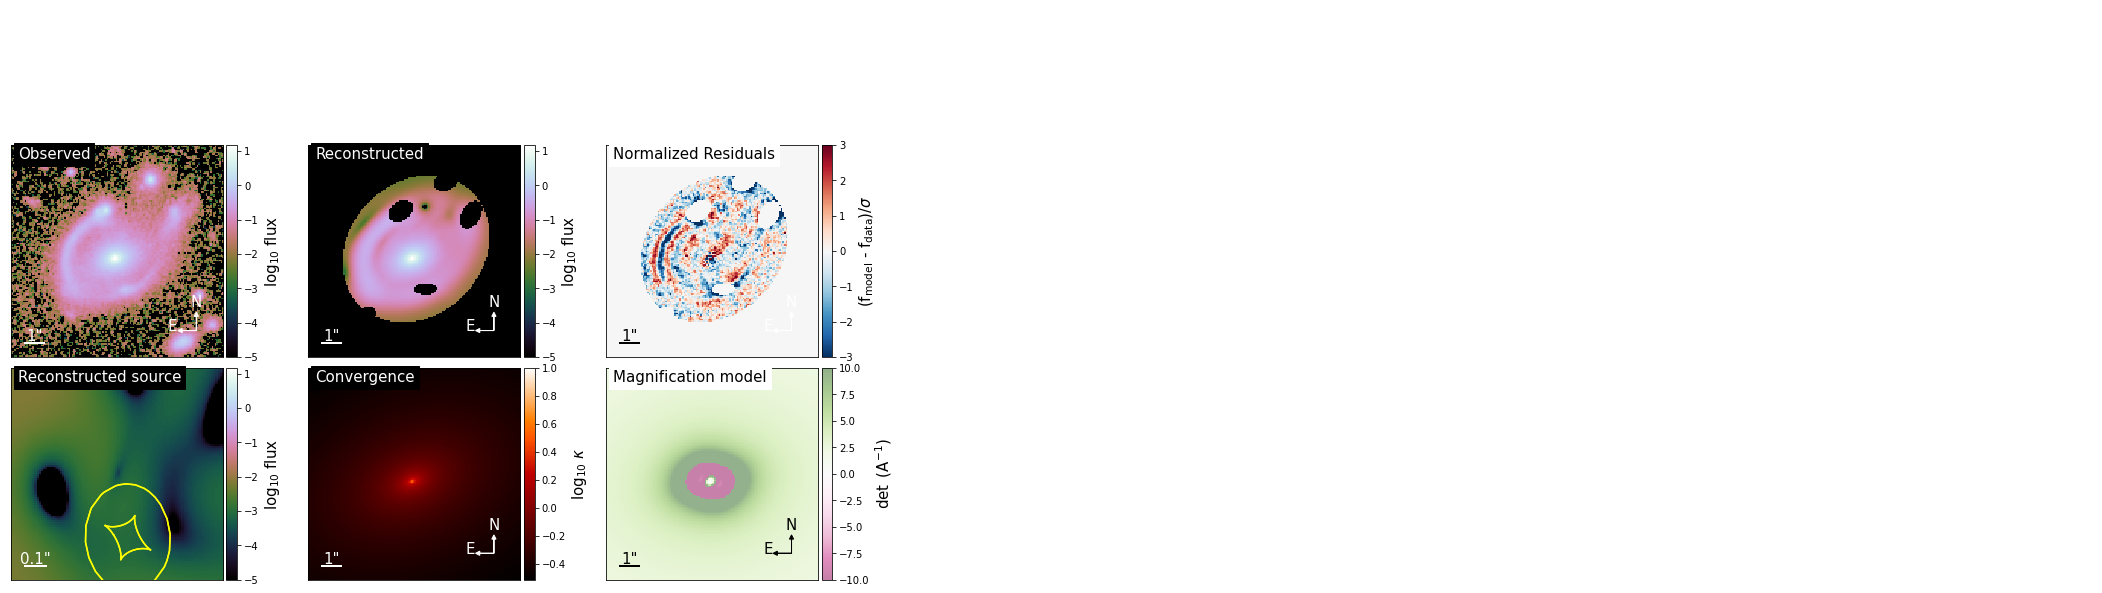

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\lenstronomy\Plots\model_band_plot.py:506: RuntimeWarning: invalid value encountered in log10
  im = ax.matshow(np.log10(model), origin='lower', vmin=v_min, vmax=v_max,


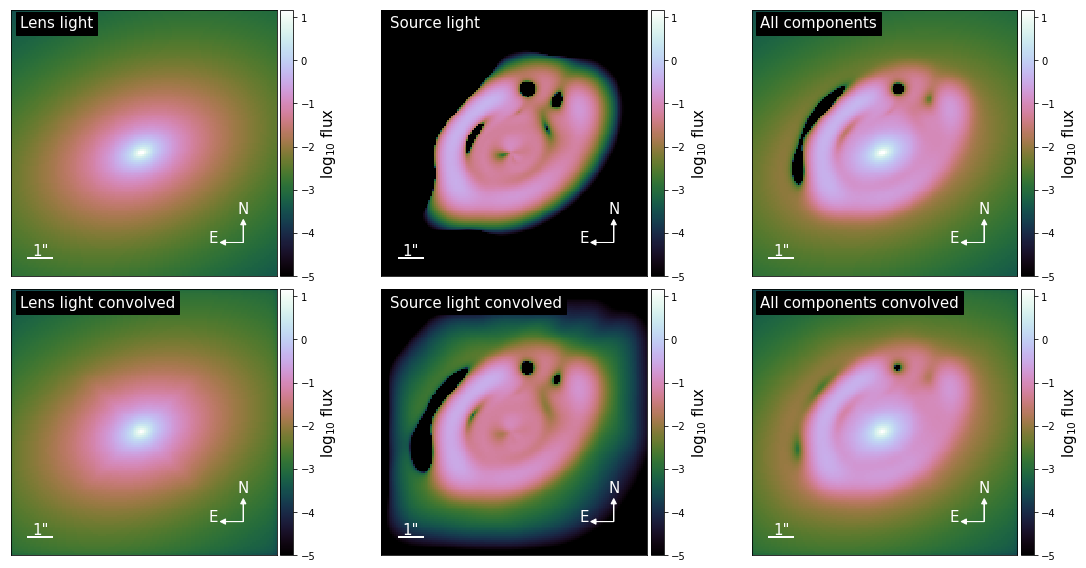

{'kwargs_lens': [{'theta_E': 1.1123315108658005, 'gamma': 1.435866431491048, 'e1': 0.15500822410032294, 'e2': -0.1413400818267736, 'center_x': 0.18902082917683666, 'center_y': -0.48237368038854006}, {'gamma1': 0.09980122356795465, 'gamma2': -0.16196424914520643, 'ra_0': 0, 'dec_0': 0}], 'kwargs_source': [{'amp': -5.0316778281250265, 'R_sersic': 0.24619090014837663, 'n_sersic': 1.0, 'e1': -0.4557591913167474, 'e2': -0.24175932754373738, 'center_x': 0.14394957651144552, 'center_y': -0.19858779892037715}, {'amp': array([ 60.46197345,  46.10634335,   3.99477054,  60.83519645,
        17.53434897,  48.55341755,  33.38424444,   4.5980704 ,
        38.38020934, -23.79252378,  55.49299319,  -5.14459537,
        47.09483888,  -1.4297268 ,  27.14637909, -10.66537369,
        -8.84782971,   9.66987835, -10.39258287,  -3.95887355,
       -13.70313689,   3.98307953,  -7.4929915 , -10.98233879,
        -6.69452765,  12.01502741,  -0.96897174,   9.7146441 ,
       -27.78103171,  12.14036021, -16.7717

In [20]:
from lenstronomy.Plots.model_plot import ModelPlot

model_plot = ModelPlot(multi_band_list, 
                       kwargs_model, 
                       kwargs_result, 
                       arrow_size=0.02,
                       cmap_string="cubehelix",
                       image_likelihood_mask_list=
                       kwargs_likelihood["image_likelihood_mask_list"]
                      )

f, axes = plt.subplots(2,
                       3,
                       figsize=(16, 8),
                       sharex=False,
                       sharey=False)

model_plot.data_plot(ax=axes[0,0])
model_plot.model_plot(ax=axes[0,1])
model_plot.normalized_residual_plot(ax=axes[0,2], 
                                    v_min=-3, 
                                    v_max=3,
                                   cmap='RdBu_r')
model_plot.source_plot(ax=axes[1, 0], 
                       deltaPix_source=0.01, 
                       numPix=100,
                       with_caustics=True)
model_plot.convergence_plot(ax=axes[1, 1],
                            v_max=1,
                            cmap='gist_heat')
model_plot.magnification_plot(ax=axes[1, 2],
                              cmap='PiYG')

f.tight_layout()
f.subplots_adjust(left=None, 
                  bottom=None, 
                  right=None, 
                  top=None, 
                  wspace=0., 
                  hspace=0.05)
plt.show()

f, axes = plt.subplots(2,
                       3,
                       figsize=(16, 8),
                       sharex=False,
                       sharey=False)

model_plot.decomposition_plot(ax=axes[0,0], 
                              text='Lens light', 
                              lens_light_add=True, 
                              unconvolved=True)
model_plot.decomposition_plot(ax=axes[1,0], 
                              text='Lens light convolved',
                              lens_light_add=True)
model_plot.decomposition_plot(ax=axes[0,1], 
                              text='Source light',
                              source_add=True, 
                              unconvolved=True)
model_plot.decomposition_plot(ax=axes[1,1], 
                              text='Source light convolved',
                              source_add=True)
model_plot.decomposition_plot(ax=axes[0,2], 
                              text='All components',
                              source_add=True, 
                              lens_light_add=True, 
                              unconvolved=True)
model_plot.decomposition_plot(ax=axes[1,2], 
                              text='All components convolved',
                              source_add=True, 
                              lens_light_add=True, 
                              point_source_add=True)

f.tight_layout()
f.subplots_adjust(left=None, 
                  bottom=None, 
                  right=None, 
                  top=None, 
                  wspace=0., 
                  hspace=0.05)
plt.show()
print(kwargs_result)